In [1]:
import pandas as pd

# read in the data files that were downloaded and save as df
test_df = pd.read_csv('fraudTest.csv')
train_df = pd.read_csv('fraudTrain.csv')

# remove columns to clean df
column_keep = ['merchant', 'category', 'amt', 'gender', 'lat', 'long', 'dob', 'is_fraud']

# clean merchant column
test_df['merchant'] = test_df['merchant'].str.split('_').str[1]
train_df['merchant'] = train_df['merchant'].str.split('_').str[1]

# one end code gender
test_df['gender'] = test_df['gender'].replace({'M': 0, 'F': 1})
train_df['gender'] = train_df['gender'].replace({'M': 0, 'F': 1})

train_df

/var/folders/xs/lp5sspvn6rg3gv4md2_3ypzr0000gn/T/ipykernel_74390/1561629556.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df['gender'] = test_df['gender'].replace({'M': 0, 'F': 1})
/var/folders/xs/lp5sspvn6rg3gv4md2_3ypzr0000gn/T/ipykernel_74390/1561629556.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['gender'] = train_df['gender'].replace({'M': 0, 'F': 1})


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,1,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,1,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,Lind-Buckridge,entertainment,220.11,Edward,Sanchez,0,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,0,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,Keeling-Crist,misc_pos,41.96,Tyler,Garcia,0,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,Reichel Inc,entertainment,15.56,Erik,Patterson,0,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,Abernathy and Sons,food_dining,51.70,Jeffrey,White,0,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,0,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,0,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [2]:
# Find a correlation matrix for all numerical data provided, to find which has the highest correlation with is_fraud
train_only_num_df = train_df.select_dtypes(include='number')

train_only_num_df.corr()

,Unnamed: 0,cc_num,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
Unnamed: 0,1.000000,0.000386,-0.000251,0.000945,0.000709,0.000602,-0.000676,-0.001678,0.998971,0.000541,-0.000671,-0.004767
cc_num,0.000386,1.000000,0.001769,-0.001112,0.041459,-0.059271,-0.048278,-0.008991,0.000354,-0.058942,-0.048252,-0.000981
amt,-0.000251,0.001769,1.000000,-0.001034,0.001843,-0.001926,-0.000187,0.005818,-0.000293,-0.001873,-0.000151,0.219404
gender,0.000945,-0.001112,-0.001034,1.000000,0.065951,-0.042935,-0.050404,0.028649,0.000960,-0.042645,-0.050350,-0.007642
zip,0.000709,0.041459,0.001843,0.065951,1.000000,-0.114290,-0.909732,0.078467,0.000670,-0.113561,-0.908924,-0.002162
lat,0.000602,-0.059271,-0.001926,-0.042935,-0.114290,1.000000,-0.015533,-0.155730,0.000632,0.993592,-0.015509,0.001894
long,-0.000676,-0.048278,-0.000187,-0.050404,-0.909732,-0.015533,1.000000,-0.052715,-0.000642,-0.015452,0.999120,0.001721
city_pop,-0.001678,-0.008991,0.005818,0.028649,0.078467,-0.155730,-0.052715,1.000000,-0.001714,-0.154781,-0.052687,0.002136
unix_time,0.998971,0.000354,-0.000293,0.000960,0.000670,0.000632,-0.000642,-0.001714,1.000000,0.000561,-0.000635,-0.005078
merch_lat,0.000541,-0.058942,-0.001873,-0.042645,-0.113561,0.993592,-0.015452,-0.154781,0.000561,1.000000,-0.015431,0.001741


In [3]:
import numpy as np
import matplotlib.pyplot as plt

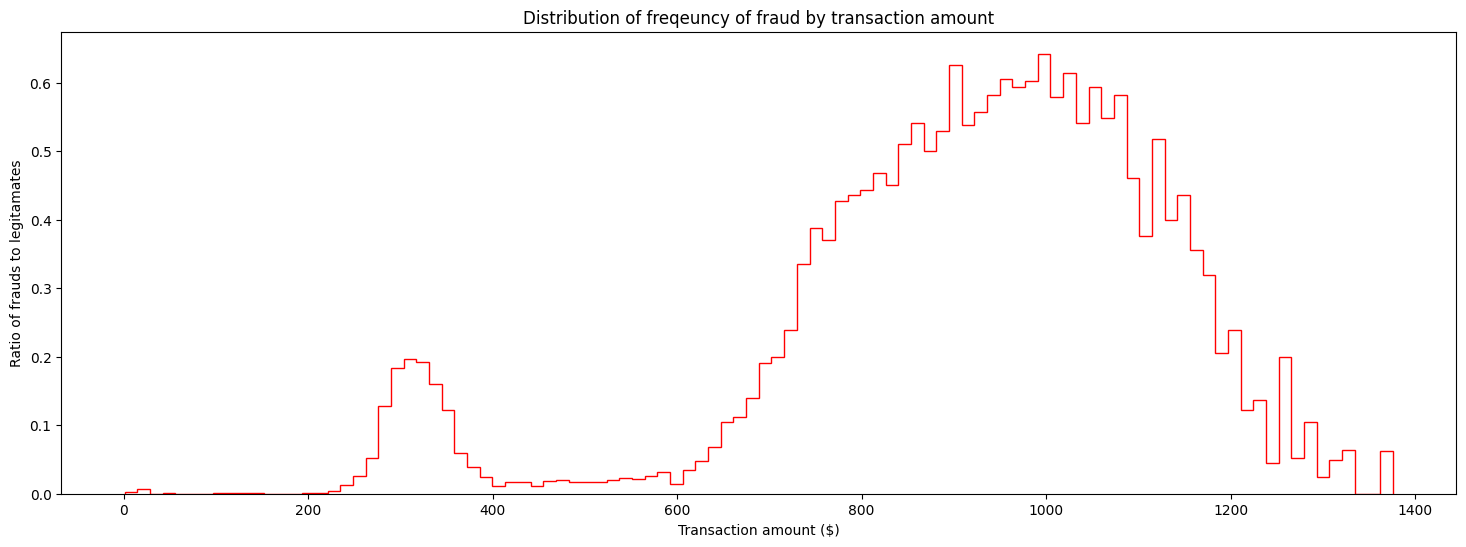

In [4]:
num_bins = 100

# The relevent range of transaction amounts: the range from the smallest fraud transaction to the largest.
bin_range = (train_df[train_df['is_fraud'] == 1]['amt'].min(), train_df[train_df['is_fraud'] == 1]['amt'].max())

# information about each of the bins of the histogram of transaction amounts.
# Namely, how many transactions are in a given bin (range of transaction values)
bins = np.histogram(train_df['amt'], bins = num_bins, range = bin_range)

# The values of each bar (bin) of the hitogram
bin_sizes = bins[0]

# The x coordinates of the start of each bin (and the end corrdinates of the last bin)
bin_coords = bins[1]

# The number of fradulent transaction in each bin
num_fraud_by_bin = np.histogram(train_df[train_df['is_fraud'] == 1]['amt'], bins = num_bins, range = bin_range)[0]

# cunstructing a list of the ratios between the number of fradulent transactions and the number of transactions for a given bin
ratio_fraud_transaction_by_bin = list()

for i in range(0, num_bins):
    if(bin_sizes[i] == 0):
        ratio_fraud_transaction_by_bin.append(0)
        continue
    ratio_fraud_transaction_by_bin.append(num_fraud_by_bin[i]/bin_sizes[i])

# Histrogram for Distribution of freqeuncy of fraudulent transactions across transaction amount ranges
plt.stairs(values = ratio_fraud_transaction_by_bin, edges = bin_coords, color ='r')
plt.xlabel('Transaction amount ($)')
plt.ylabel('Ratio of frauds to legitamates')
plt.title('Distribution of freqeuncy of fraud by transaction amount')
plt.gcf().set_size_inches(18, 6)
plt.show()

This histogram shows how frequent fradulent transactions are in regular ranges of transactions.
Each individual bar's hight is the ratio of the number of fradulent transactions within the bar's range to the number of trasactions in the bar's range.
So, for example, a bar on the range (300, 320) with a hieght of .8 would imply that, for all transactions with a transaction amount between 300 and 320, 80% of those transactions are fradulent.

Note that the histogram has been limited to the relevant range. That is, the range where fradulent transactions appear. The range of actual transactions is much larger.

From this histogram, a clear pattern emerges: Fradulent transactions make up a disproportionate amount of the transactions with amounts between 600 and 1300. In fact, transactions with an amount around $1000 generally have a greater chance to be fradulent than legitamate.

## Unused work:
The following code cells were developed while trying to create the final product above. While they do not revel much useful information for visualization now, they may be useful latter.

The merchant_fraud_ratio_series in particular may be useful for determining if a transaction is expected to be fradulent based on the merchant it originated from / was paied to.

In [5]:
merchants = train_df['merchant'].unique()

# Find the number of fradulent transactions each merchant has
num_frauds_by_merchant = dict((merchant, 0) for merchant in merchants)
for merchant in train_df[train_df['is_fraud'] == 1]['merchant']:
    num_frauds_by_merchant[f'{merchant}'] += 1

# Find the number of transactions each merchant has
num_transactions_by_merchant = dict((merchant, 0) for merchant in merchants)
for merchant in train_df['merchant']:
    num_transactions_by_merchant[f'{merchant}'] += 1



# Find the ratio of frauds to transactions each merchent has
merchant_fraud_ratio = dict((merchant, 0) for merchant in merchants)
for merchant in merchants:
    merchant_fraud_ratio[f'{merchant}'] = num_frauds_by_merchant[f'{merchant}'] / num_transactions_by_merchant[f'{merchant}']

# Create a seres from the data, sorted into decedning order
merchant_fraud_ratio_series = pd.Series(merchant_fraud_ratio).sort_values(ascending = False)

# Remove all non-fradulent merchants
merchant_fraud_ratio_series = merchant_fraud_ratio_series[merchant_fraud_ratio_series != 0]

merchant_fraud_ratio_series

Kozey-Boehm                      0.025723
Herman, Treutel and Dickens      0.025385
Kerluke-Abshire                  0.022307
Brown PLC                        0.022109
Goyette Inc                      0.021616
                                   ...   
Berge-Hills                      0.000438
Schmidt-Larkin                   0.000420
Prosacco, Kreiger and Kovacek    0.000410
Beier and Sons                   0.000404
Eichmann-Kilback                 0.000392
Length: 679, dtype: float64

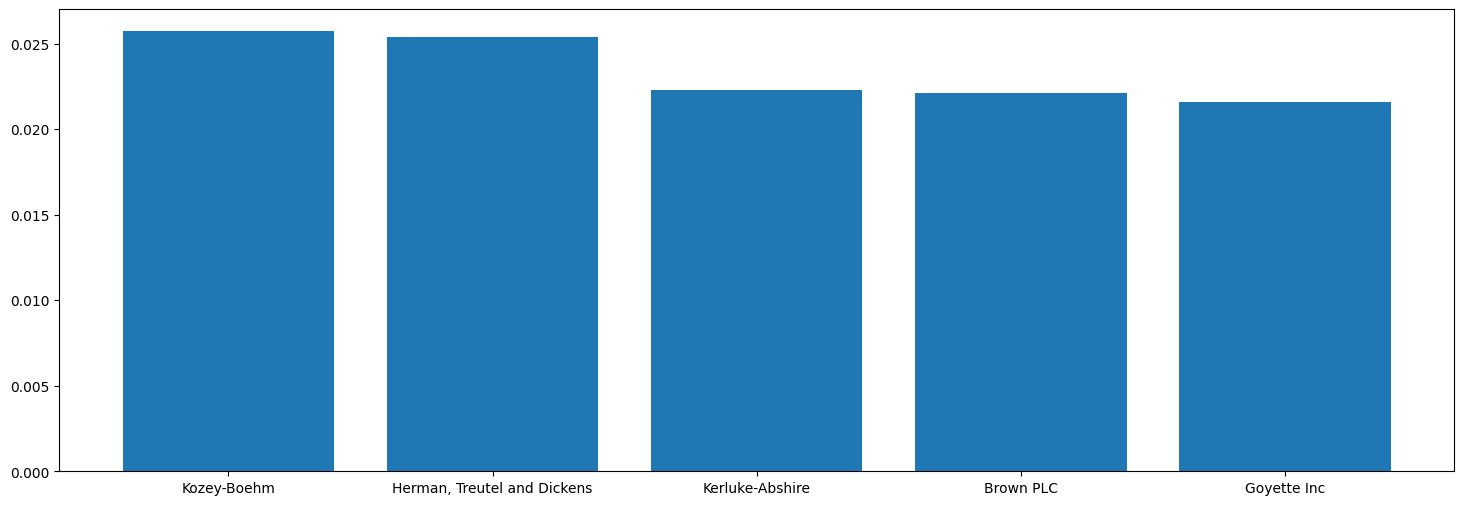

In [6]:
# Histogram to compare rate of fraudulent transactions between the 20 most fraudulent merchants

plt.bar(merchant_fraud_ratio_series.head().keys(), merchant_fraud_ratio_series.head())


# num_merchants = 8

# features = merchant_fraud_ratio_series[0:num_merchants].keys()
# features

# plt.hist(features, color ='g', bins = num_merchants)
# plt.xlabel('Merchant')
# plt.ylabel('Ratio of fraudulent transactions to number of transactions')
plt.gcf().set_size_inches(18, 6)
# plt.title('Merchant fraud rates')
# plt.show()

In [7]:

# bins = 10

# low_amt_df = test_df[test_df['amt'] <= 1000]
# med_amt_df = test_df[test_df['amt'] > 1000][test_df['amt'] <= 2000]
# high_amt_df = test_df[test_df['amt'] > 2000]

# # Histrogram for districution of fradulent transactions accros transaction amounts for low transaction values
# plt.hist(low_amt_df[low_amt_df['is_fraud'] == 1]['amt'], bins=bins, color ='r')
# plt.xlabel('Transaction amount')
# plt.ylabel('count')
# plt.title('Distribution of low fraudulent transaction amounts')
# plt.gcf().set_size_inches(18, 6)
# plt.show()

# # Histogram for districution of legitamate transactions accros transaction amounts for low transaction values
# plt.hist(low_amt_df[low_amt_df['is_fraud'] == 0]['amt'], bins=bins, color ='b')
# plt.xlabel('Transaction amount')
# plt.ylabel('count')
# plt.title('Distribution of low legitimate transaction amounts')
# plt.gcf().set_size_inches(18, 6)
# plt.show()


# # Histrogram for districution of fradulent transactions accros transaction amounts for med transaction values
# plt.hist(med_amt_df[med_amt_df['is_fraud'] == 1]['amt'], bins=bins, color ='r')
# plt.xlabel('Transaction amount')
# plt.ylabel('count')
# plt.title('Distribution of med fraudulent transaction amounts')
# plt.gcf().set_size_inches(18, 6)
# plt.show()

# # Histogram for districution of legitamate transactions accros transaction amounts for med transaction values
# plt.hist(med_amt_df[med_amt_df['is_fraud'] == 0]['amt'], bins=bins, color ='b')
# plt.xlabel('Transaction amount')
# plt.ylabel('count')
# plt.title('Distribution of med legitimate transaction amounts')
# plt.gcf().set_size_inches(18, 6)
# plt.show()


# # Histrogram for districution of fradulent transactions accros transaction amounts for high transaction values
# plt.hist(high_amt_df[high_amt_df['is_fraud'] == 1]['amt'], bins=bins, color ='r')
# plt.xlabel('Transaction amount')
# plt.ylabel('count')
# plt.title('Distribution of high fraudulent transaction amounts')
# plt.gcf().set_size_inches(18, 6)
# plt.show()

# # Histogram for districution of legitamate transactions accros transaction amounts for high transaction values
# plt.hist(high_amt_df[high_amt_df['is_fraud'] == 0]['amt'], bins=bins, color ='b')
# plt.xlabel('Transaction amount')
# plt.ylabel('count')
# plt.title('Distribution of high legitimate transaction amounts')
# plt.gcf().set_size_inches(18, 6)
# plt.show()
